<a href="https://colab.research.google.com/github/Shanmukhappa-paraddi/Data_Science_Projects/blob/main/Titanic_Disaster_Analysis/titanic_disaster_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


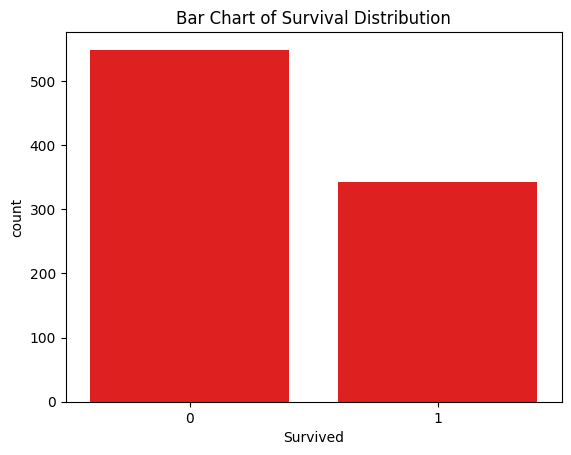

In [38]:
sns.countplot(x='Survived',data=data, color='red')
plt.title("Bar Chart of Survival Distribution")
plt.show()

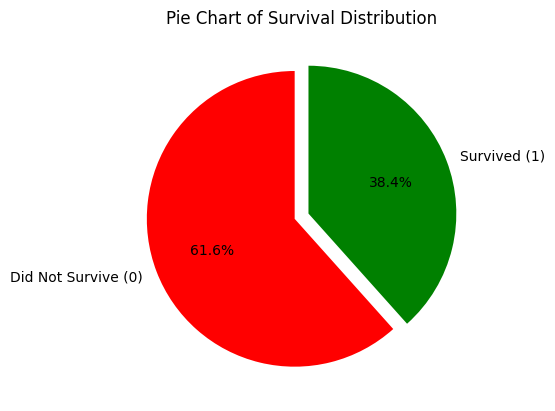

In [39]:
# plt.figure(figsize=(6,6))
plt.pie(data['Survived'].value_counts(), labels=['Did Not Survive (0)', 'Survived (1)'], autopct='%1.1f%%', startangle=90,
        colors=['red', 'green'], explode=(0.05, 0.05))
plt.title("Pie Chart of Survival Distribution")
plt.show()

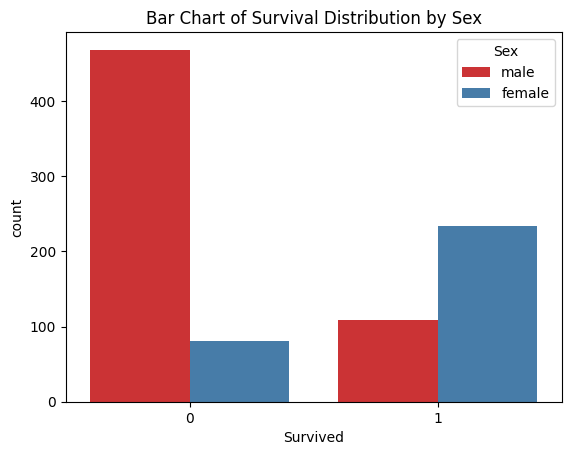

In [40]:
sns.countplot(x='Survived', hue='Sex', data=data, palette='Set1')
plt.title("Bar Chart of Survival Distribution by Sex")
plt.show()

In [41]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

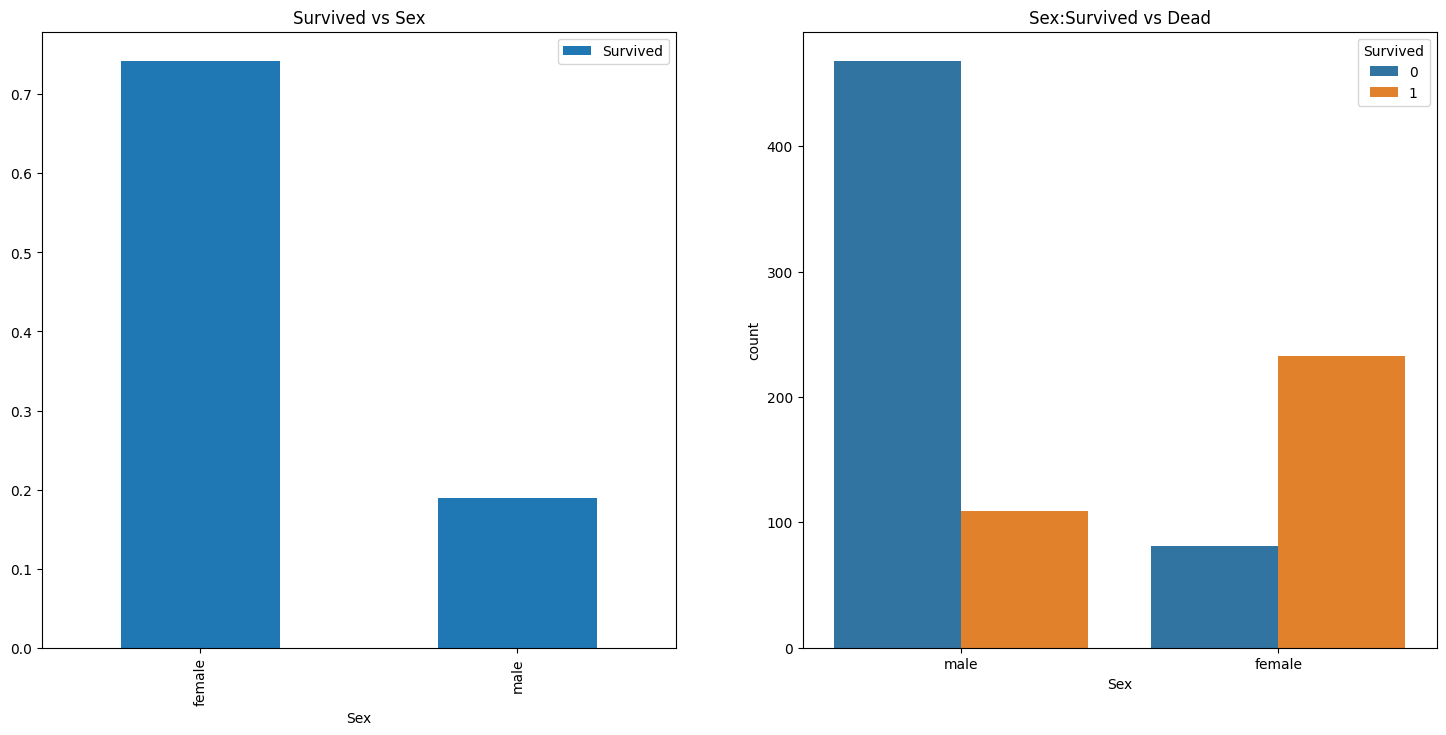

In [42]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

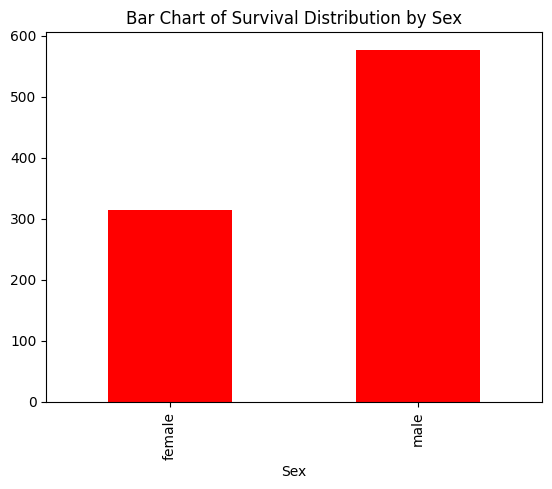

In [43]:
data.groupby('Sex')['Survived'].count().plot(kind='bar', color='red')
plt.title("Bar Chart of Survival Distribution by Sex")
plt.show()

In [44]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [45]:
data.Pclass.value_counts()

,count
Pclass,
3,491
1,216
2,184


/tmp/ipython-input-3992416369.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=data, palette='viridis')


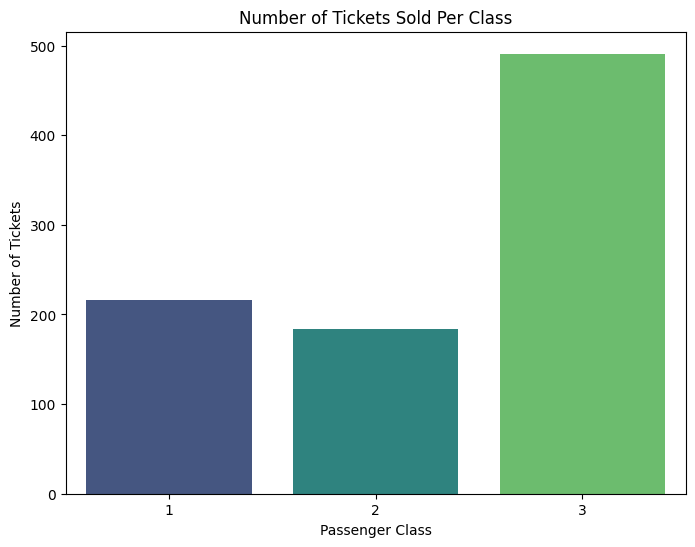

In [46]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=data, palette='viridis')
plt.title("Number of Tickets Sold Per Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Tickets")
plt.show()

Text(0, 0.5, 'Number of Tickets')

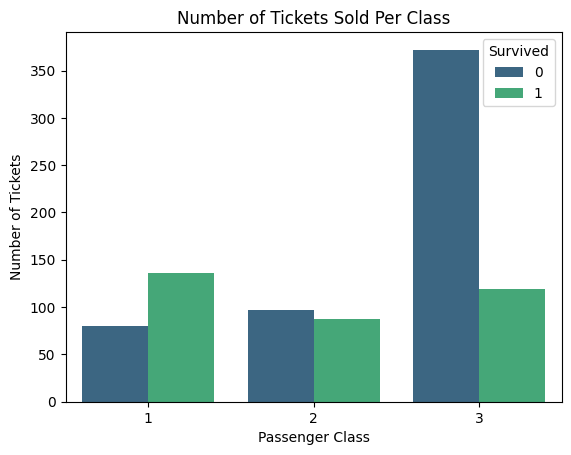

In [47]:
sns.countplot(x='Pclass', hue='Survived', data=data, palette='viridis')
plt.title("Number of Tickets Sold Per Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Tickets")

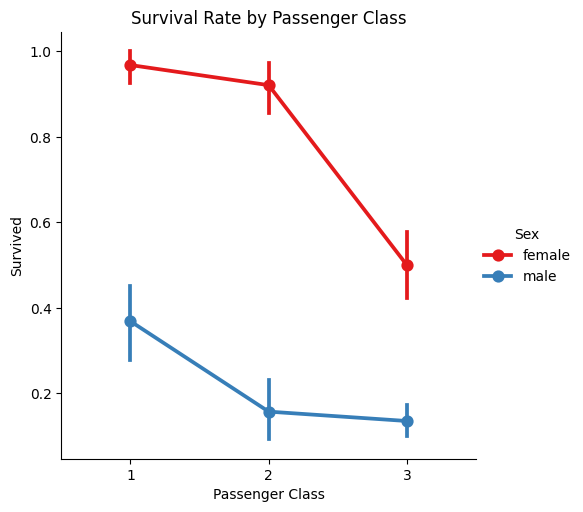

In [48]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point', palette='Set1')
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.show()

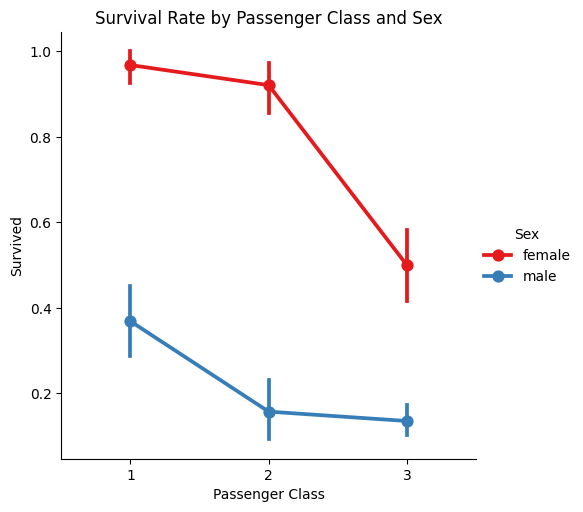

In [49]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point', palette='Set1')
plt.title("Survival Rate by Passenger Class and Sex")
plt.xlabel("Passenger Class")
plt.show()

In [50]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean().round(2),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.7 Years


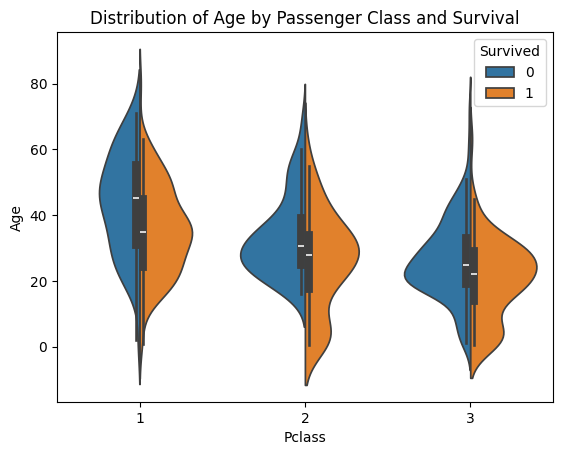

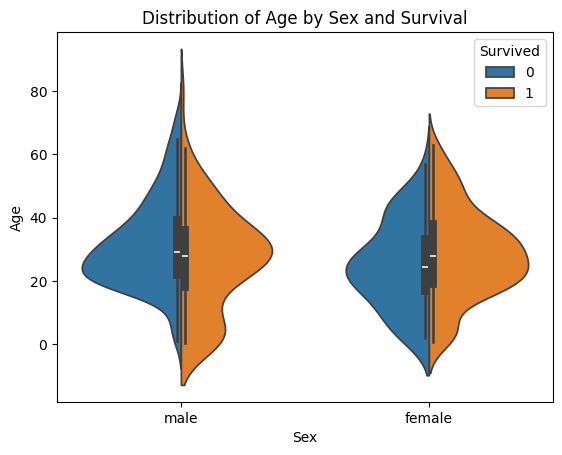

In [51]:
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=data,split=True)
plt.title('Distribution of Age by Passenger Class and Survival')
plt.show()
sns.violinplot(x="Sex", y="Age", hue="Survived", data=data,split=True)
plt.title('Distribution of Age by Sex and Survival')
plt.show()

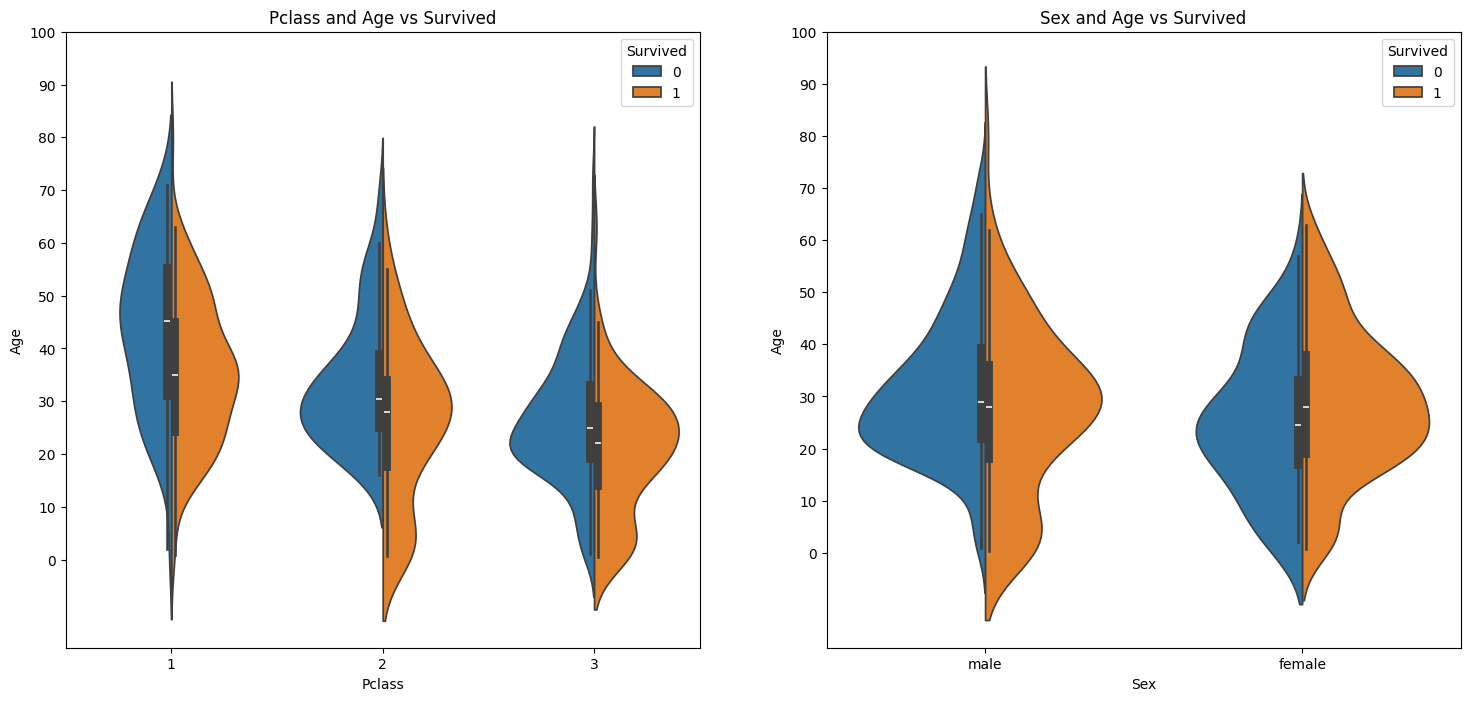

In [52]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=data,split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=data,split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [53]:
data[data['Age']==data['Age'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [54]:
data[data['Age']==data['Age'].min()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract(r'([A-Za-z]+)\.')



In [57]:
data['Initial']

,Initial
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [58]:
data['Initial'].value_counts()

,count
Initial,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [59]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [60]:
data['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [61]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [62]:
data['Initial'].value_counts()

,count
Initial,
Mr,529
Miss,186
Mrs,127
Master,40
Other,9


In [63]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

,Age
Initial,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.981818
Other,45.888889


In [64]:
data.Age.isnull().any() #null values left

np.True_

In [65]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [66]:
data.Age.isnull().any() #So no null values left finally

np.False_